**<h3> This file focuses on implementation of a pretrained architecture i.e. ResNet50 -> train and test model using x-ray image dataset </h3>**

In [ ]:
#Unzipping the dataset in zipped folder

!unzip /content/xray_normal_pneumonia_small.zip

Archive:  /content/xray_normal_pneumonia_small.zip
   creating: content/train/
   creating: content/train/pneumonia/
  inflating: content/train/pneumonia/pneumonia_00011472_001.png  
  inflating: content/train/pneumonia/pneumonia_00010693_012.png  
  inflating: content/train/pneumonia/pneumonia_00009903_000.png  
  inflating: content/train/pneumonia/pneumonia_00006759_001.png  
  inflating: content/train/pneumonia/pneumonia_00000893_000.png  
  inflating: content/train/pneumonia/pneumonia_00009081_000.png  
  inflating: content/train/pneumonia/pneumonia_00005567_025.png  
  inflating: content/train/pneumonia/pneumonia_00010334_010.png  
  inflating: content/train/pneumonia/pneumonia_00002451_007.png  
  inflating: content/train/pneumonia/pneumonia_00006985_002.png  
  inflating: content/train/pneumonia/pneumonia_00005638_000.png  
  inflating: content/train/pneumonia/pneumonia_00001837_002.png  
  inflating: content/train/pneumonia/pneumonia_00005274_011.png  
  inflating: content/trai

In [ ]:
#Importing required libraries

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
train_dir = "/content/content/train"
test_dir = "/content/content/test"

<h3> Preprocessing of the image dataset: </h3>



*   Normalization of pixel intensity values
*   Resizing the image for faster training

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle = False
)

Found 100 images belonging to 2 classes.


In [ ]:
test_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle = False
)

Found 20 images belonging to 2 classes.


**<h4> Calling ResNet50 pretrained architecture for the classification task. </h4>**

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

base_model.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
#Creating the model upon ResNet50
#The model is called in untrained version -> Adding a few trainable layers for classification task

model = Sequential([base_model, GlobalAveragePooling2D(),
                    Dense(128, activation = 'relu'),
                    Dense(1, activation='sigmoid')])

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#model training

history = model.fit(train_generator, epochs=5, validation_data=test_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 28s 4s/step - accuracy: 0.3077 - loss: 0.7951 - val_accuracy: 0.5000 - val_loss: 0.6951
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.7059 - loss: 0.7320 - val_accuracy: 0.5000 - val_loss: 0.8206
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.6471 - loss: 0.6820 - val_accuracy: 0.5000 - val_loss: 0.8134
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.6471 - loss: 0.6523 - val_accuracy: 0.5000 - val_loss: 0.7467
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.4271 - loss: 0.7974 - val_accuracy: 0.5000 - val_loss: 0.6929


In [ ]:
#model evaluation

loss, accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {accuracy}')
print(f'Test loss: {loss}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6929
Test accuracy: 0.5
Test loss: 0.6928923726081848


In [ ]:
#saving the model

model.save("xray_classification_pretrained.h5")

**<h2> Visualization of the image along with the comparison between the prediciton and the actual values </h2>**

In [ ]:
def visualize_predictions(filepath, model):
  img = image.load_img(filepath, target_size=(150, 150))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)

  predictions = model.predict(img_array)

  predicted_label = "Pneumonia" if predictions[0][0] > 0.5 else "Normal"
  actual_label = "Pneumonia" if "pneumonia" in filepath else "Normal"

  plt.imshow(img)
  plt.title(f"Predicted Label: {predicted_label}  | Actual Label: {actual_label}")
  plt.axis('off')
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


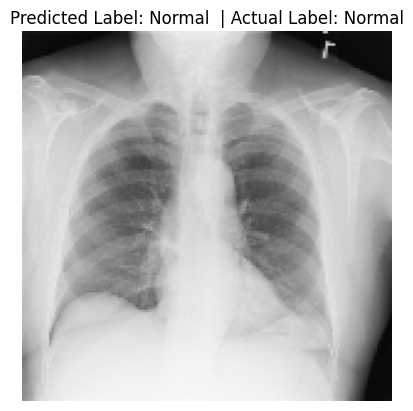

In [ ]:
simple_filepath = "/content/content/test/normal/normal_00000018_000.png"
visualize_predictions(simple_filepath, model)